In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = "datasets/pune_processed.csv"
data = pd.read_csv(dataset)
df_comp=pd.DataFrame(data)
df_comp.head()

,date_time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,EnergyGenerated
0,2013-01-01 00:00:00,25.0,10,89,161,12,667.0,3.9288,2.75016
1,2013-01-01 01:00:00,25.0,11,90,164,11,667.0,4.3395,3.03765
2,2013-01-01 02:00:00,25.0,11,91,167,10,667.0,23.7314,16.61198
3,2013-01-01 03:00:00,25.0,11,91,171,9,667.0,46.5164,32.56148
4,2013-01-01 04:00:00,25.0,12,86,172,9,667.0,15.3852,10.76964


In [3]:
df_comp['EnergyGenerated']=df_comp.EnergyGenerated
df_comp.head()

,date_time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,EnergyGenerated
0,2013-01-01 00:00:00,25.0,10,89,161,12,667.0,3.9288,2.75016
1,2013-01-01 01:00:00,25.0,11,90,164,11,667.0,4.3395,3.03765
2,2013-01-01 02:00:00,25.0,11,91,167,10,667.0,23.7314,16.61198
3,2013-01-01 03:00:00,25.0,11,91,171,9,667.0,46.5164,32.56148
4,2013-01-01 04:00:00,25.0,12,86,172,9,667.0,15.3852,10.76964


In [4]:
df_comp['date_time'] = pd.to_datetime(df_comp['date_time'])
df_comp2 = df_comp.groupby(df_comp['date_time'].dt.date).agg({ 'EnergyGenerated': 'sum'}).reset_index()
df_comp2.describe()

,EnergyGenerated
count,2557.000000
mean,555.979390
std,511.725708
min,11.802560
25%,204.413720
50%,369.381670
75%,722.684130
max,2998.398270


C:\Users\Sri Harsh\AppData\Local\Temp\ipykernel_10256\1877663863.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[threshold1 <= z_scores]


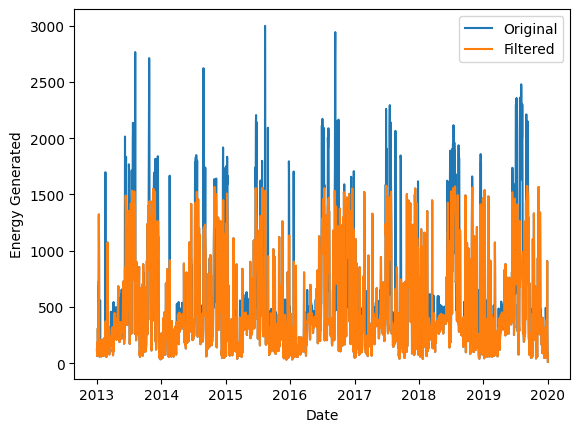

In [5]:
import matplotlib.pyplot as plt

plt.plot(df_comp2['date_time'], df_comp2['EnergyGenerated'], label='Original')

z_scores = np.abs((df_comp2['EnergyGenerated'] - df_comp2['EnergyGenerated'].mean()) / df_comp2['EnergyGenerated'].std())
threshold1 = 0.2
threshold2 = 2
df_filtered = df_comp2[z_scores <= threshold2]
df_filtered = df_filtered[threshold1 <= z_scores]

df_filtered['EnergyGenerated'] = df_filtered['EnergyGenerated'].fillna((df_filtered['EnergyGenerated'].shift(1) + df_filtered['EnergyGenerated'].shift(-1) + df_filtered['EnergyGenerated'].shift(-2) + df_filtered['EnergyGenerated'].shift(2)) / 4)


plt.plot(df_filtered['date_time'], df_filtered['EnergyGenerated'], label='Filtered')

plt.xlabel('Date')
plt.ylabel('Energy Generated')
plt.legend()


plt.show()


In [6]:
df_filtered['Temperature'] = df_comp['Temperature']
df_filtered['pressure'] = df_comp['Pressure']
df_filtered['humidity'] = df_comp['Humidity']
df_filtered['WindDirection(Degrees)'] = df_comp['WindDirection(Degrees)']
df_filtered['Speed'] = df_comp['Speed']
df_filtered['SunLightDuration'] = df_comp['SunLightDuration']
df_filtered['SolarRadiation'] = df_comp['SolarRadiation']

In [7]:
df_filtered.describe()

,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation
count,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000
mean,447.814539,26.610280,11.451737,41.980212,136.826255,12.458494,704.400097,15.498884
std,389.963724,3.350162,3.439704,19.407200,48.200528,3.617146,26.713941,21.675417
min,11.802560,22.000000,2.000000,8.000000,1.000000,1.000000,667.000000,1.261300
25%,176.249167,23.500000,9.000000,27.000000,117.000000,10.000000,679.750000,3.277400
50%,303.119670,26.000000,12.000000,38.000000,137.000000,13.000000,701.000000,4.510800
75%,677.414360,29.500000,14.000000,54.000000,151.000000,15.000000,728.000000,19.353850
max,1579.003090,33.000000,18.000000,97.000000,358.000000,24.000000,753.000000,118.835500


In [8]:
df_filtered.isnull().sum()

date_time                 0
EnergyGenerated           0
Temperature               0
pressure                  0
humidity                  0
WindDirection(Degrees)    0
Speed                     0
SunLightDuration          0
SolarRadiation            0
dtype: int64

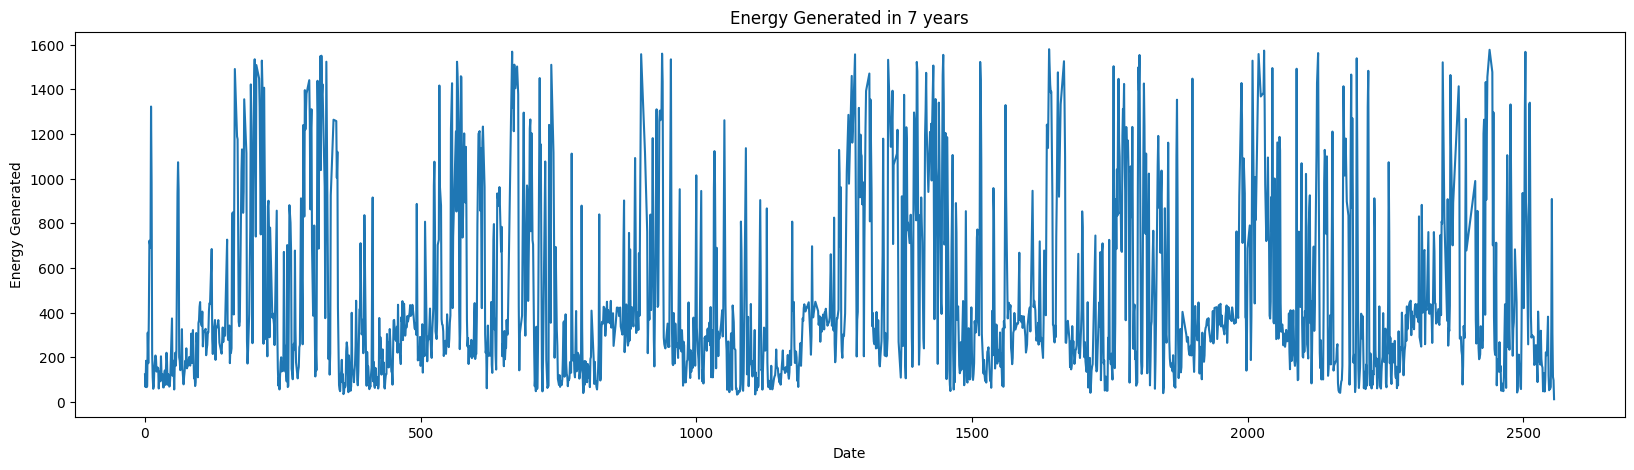

In [9]:
# Set the 'date' column as the index
df_filtered['date_time'] = pd.to_datetime(df_filtered['date_time'])


fig, ax = plt.subplots(figsize=(20,5))
ax.plot(df_filtered['EnergyGenerated'].index, df_filtered['EnergyGenerated'])

ax.set_xlabel('Date')
ax.set_ylabel('Energy Generated')
ax.set_title('Energy Generated in 7 years')
plt.show()

In [10]:
import pandas as pd

# Extract month and day of the year from the 'datetime' column
df_filtered['month'] = df_filtered['date_time'].dt.month
df_filtered['day_of_year'] = df_filtered['date_time'].dt.dayofyear

summer_condition = ((df_filtered['month'] >= 6) & (df_filtered['month'] <= 8))
winter_condition = ((df_filtered['month'] >= 12) | (df_filtered['month'] <= 2))
rainy_condition = ((df_filtered['month'] >= 3) & (df_filtered['month'] <= 5))

# Create the 'isSummer', 'isWinter', and 'isRainy' columns
df_filtered['isSummer'] = summer_condition.astype(int)
df_filtered['isWinter'] = winter_condition.astype(int)
df_filtered['isRainy'] = rainy_condition.astype(int)


In [11]:
size = int(len(df_filtered)*0.8)
df_train, df_test = df_filtered.iloc[:size], df_filtered.iloc[size:]
df_test.head()

,date_time,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,month,day_of_year,isSummer,isWinter,isRainy
2048,2018-08-11,351.33588,31.5,9,22,202,16,733.0,3.8051,8,223,1,0,0
2049,2018-08-12,1000.09770,31.5,9,18,193,14,733.0,18.1675,8,224,1,0,0
2052,2018-08-15,280.92519,31.5,5,16,172,12,733.0,23.5455,8,227,1,0,0
2054,2018-08-17,1161.50412,31.5,4,17,154,13,733.0,18.7558,8,229,1,0,0
2056,2018-08-19,282.90514,31.5,5,19,143,14,733.0,18.6217,8,231,1,0,0


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_filtered['EnergyGenerated'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -8.0817617938871
p-value: 1.4550336183374428e-12
Critical Values: {'1%': -3.4335283821660165, '5%': -2.8629440605704812, '10%': -2.567517458054482}


In [14]:
df_filtered.head()

,date_time,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,month,day_of_year,isSummer,isWinter,isRainy
0,2013-01-01,123.00981,25.0,10,89,161,12,667.0,3.9288,1,1,0,1,0
1,2013-01-02,66.55586,25.0,11,90,164,11,667.0,4.3395,1,2,0,1,0
2,2013-01-03,183.98961,25.0,11,91,167,10,667.0,23.7314,1,3,0,1,0
3,2013-01-04,65.83591,25.0,11,91,171,9,667.0,46.5164,1,4,0,1,0
4,2013-01-05,69.85356,25.0,12,86,172,9,667.0,15.3852,1,5,0,1,0


## Using ARIMA model

In [15]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(df_filtered["EnergyGenerated"],trace=True,suppress_warnings=True)
# stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=29355.109, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=30606.408, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=29367.244, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=29733.318, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32347.548, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=29355.404, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=29370.656, Time=0.71 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=29352.745, Time=1.29 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=29329.194, Time=2.27 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=29357.406, Time=0.32 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=29345.286, Time=0.66 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=29369.047, Time=0.17 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=29343.952, Time=0.31 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.15 sec
 ARIMA(3,0,1)(0,0,0)[0]  

In [16]:
from statsmodels.tsa.arima.model import ARIMA
model_Arima = ARIMA(df_train["EnergyGenerated"],order=(3,0,1))
model_Arima = model_Arima.fit()
model_Arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        EnergyGenerated   No. Observations:                 1657
Model:                 ARIMA(3, 0, 1)   Log Likelihood              -11691.003
Date:                Thu, 29 Jun 2023   AIC                          23394.007
Time:                        13:33:24   BIC                          23426.484
Sample:                             0   HQIC                         23406.045
                               - 1657                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        453.4576     66.067      6.864      0.000     323.969     582.946
ar.L1          1.5167      0.040     38.305      0.000       1.439       1.594
ar.L2         -0.6062      0.038    -15.905      0.000      -0.681      -0.531
ar.L3          0.0700      0.021      3.300      0.001       0.028       0.112
ma.L1         -0.8729      0.033    -26.589      0.000      -0.937      -0.809
sigma2      7.864e+04   2514.331     31.278      0.000    7.37e+04    8.36e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               683.08
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                             0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
start = len(df_train)
end =len(df_train)+len(df_test)-1
pred_arima = model_Arima.predict(start=start,end=end,type='levels')
pred_arima.index = df_filtered.index[start:end+1]
print(pred_arima)

2048    425.868322
2049    542.714015
2052    598.830847
2054    617.900968
2056    620.988207
           ...    
2552    453.457588
2553    453.457587
2554    453.457586
2555    453.457585
2556    453.457584
Name: predicted_mean, Length: 415, dtype: float64


In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_arima = sqrt(mean_squared_error(pred_arima,df_test["EnergyGenerated"]))/10
print(rmse_arima)


37.77642958676866



## Using Arima with Features

In [19]:
# Define the exogenous variables
exog_vars = ['isSummer', 'isWinter', 'isRainy', 'Temperature', 'pressure', 'humidity', 'WindDirection(Degrees)', 'Speed', 'SunLightDuration']


model_Arima2 = ARIMA(df_train['EnergyGenerated'], order=(3, 0, 1), exog=df_train[exog_vars])
model_fit = model_Arima2.fit()

pred_arima2 = model_fit.forecast(steps=len(df_test), exog=df_test[exog_vars])
pred_arima2.index = df_filtered.index[start:end+1]

In [20]:
# Evaluate the forecast
rmse_arima2 = sqrt(mean_squared_error(pred_arima2,df_test["EnergyGenerated"]))/10

print("rmse_arima2:", rmse_arima2)
print("Forecasted energy generation:", pred_arima2)


rmse_arima2: 40.15069684174745
Forecasted energy generation: 2048    455.094790
2049    612.203258
2052    677.419204
2054    701.840609
2056    722.631740
           ...    
2552    352.440140
2553    379.764751
2554    359.147731
2555    348.510927
2556    337.874123
Name: predicted_mean, Length: 415, dtype: float64


## Using AutoRegression Model

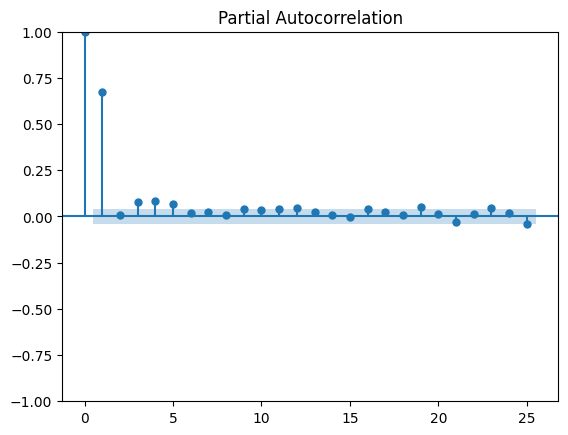

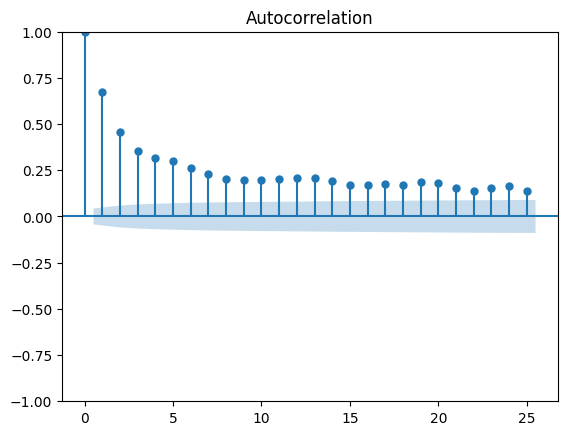

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pacf = plot_pacf(df_filtered['EnergyGenerated'],lags=25) 
acf = plot_acf(df_filtered['EnergyGenerated'],lags=25)

In [22]:
from statsmodels.tsa.ar_model import AutoReg
model_AutoReg = AutoReg(df_train['EnergyGenerated'],lags=5).fit()
print(model_AutoReg.summary())

                            AutoReg Model Results                             
Dep. Variable:        EnergyGenerated   No. Observations:                 1657
Model:                     AutoReg(5)   Log Likelihood              -11663.408
Method:               Conditional MLE   S.D. of innovations            281.811
Date:                Thu, 29 Jun 2023   AIC                          23340.816
Time:                        13:33:28   BIC                          23378.684
Sample:                             5   HQIC                         23354.855
                                 1657                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                105.5284     12.320      8.566      0.000      81.382     129.674
EnergyGenerated.L1     0.6544      0.025     26.599      0.000       0.606       0.703
EnergyGenerated.L2  

In [23]:
pred_autoreg = model_AutoReg.predict(start=start,end=end,dynamic = False)
pred_autoreg.index = df_filtered.index[start:end+1]
print(pred_autoreg)

2048    384.866843
2049    493.189133
2052    556.820771
2054    585.064643
2056    527.106731
           ...    
2552    456.086856
2553    456.086856
2554    456.086856
2555    456.086856
2556    456.086856
Length: 415, dtype: float64


In [24]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_autoreg = sqrt(mean_squared_error(df_test['EnergyGenerated'],pred_autoreg))/10
print(rmse_autoreg)


37.58810287702587


## Using SARIMA

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the exogenous variables
exog_vars =['isSummer', 'isWinter', 'isRainy', 'Temperature', 'pressure', 'humidity', 'WindDirection(Degrees)', 'Speed', 'SunLightDuration']


model_Sarima = SARIMAX(df_train['EnergyGenerated'], order=(3, 0, 1), seasonal_order=(1, 0, 1, 12), exog=df_train[exog_vars])
model_fit = model_Sarima.fit()

In [26]:
# Forecast future energy generation
pred_sarima = model_fit.forecast(steps=len(df_test), exog=df_test[exog_vars])
pred_sarima.index = df_filtered.index[start:end+1]

rmse_sarima = sqrt(mean_squared_error(pred_sarima,df_test["EnergyGenerated"]))/10


print("rmse_arima2:", rmse_sarima)

print("Forecasted energy generation:", pred_sarima)


rmse_arima2: 40.15188899337787
Forecasted energy generation: 2048    438.555884
2049    632.202406
2052    689.928234
2054    693.826031
2056    720.502346
           ...    
2552    353.856394
2553    380.337770
2554    361.418326
2555    351.818207
2556    342.218210
Name: predicted_mean, Length: 415, dtype: float64


## Using Prophet Model

In [27]:

from prophet.plot import plot_plotly, plot_components_plotly
import prophet as pt


In [28]:
df_prophet = pd.DataFrame()
df_prophet ["ds"] = data["date_time"]
df_prophet["y"] = data["EnergyGenerated"]
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

df_prophet = df_prophet.groupby(df_prophet['ds'].dt.date).agg({ 'y': 'sum'}).reset_index()

df_prophet.head()

,ds,y
0,2013-01-01,123.00981
1,2013-01-02,66.55586
2,2013-01-03,183.98961
3,2013-01-04,65.83591
4,2013-01-05,69.85356


In [29]:
# Filter out the outliers
z_scores = np.abs((df_prophet['y'] - df_prophet['y'].mean()) / df_prophet['y'].std())

threshold1 = 0.2
threshold2 = 2

df_prophet_filtered = df_prophet[z_scores <= threshold2]
df_prophet_filtered = df_prophet_filtered[threshold1 <= z_scores]


df_prophet_filtered['y'] = df_prophet_filtered['y'].fillna((df_prophet_filtered['y'].shift(1) + df_prophet_filtered['y'].shift(-1) + df_prophet_filtered['y'].shift(-2) + df_prophet_filtered['y'].shift(2)) / 4)


In [30]:
size = int(len(df_prophet_filtered)*0.8)

df_prophet_train = df_prophet_filtered.iloc[:size]
df_prophet_test = df_prophet_filtered.iloc[size:]

In [31]:
model_prophet = pt.Prophet()
model_prophet.fit(df_prophet_train)
future = model_prophet.make_future_dataframe(periods=415) 
forecast = model_prophet.predict(future) 

13:33:39 - cmdstanpy - INFO - Chain [1] start processing
13:33:39 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2067,2019-09-25,627.385332,63.565497,932.786994,620.859995,633.928275,-110.838015,-110.838015,-110.838015,-6.352220,-6.352220,-6.352220,-104.485795,-104.485795,-104.485795,0.0,0.0,0.0,516.547318
2068,2019-09-26,627.529238,141.138246,975.138167,620.986435,634.090222,-91.720430,-91.720430,-91.720430,11.498357,11.498357,11.498357,-103.218787,-103.218787,-103.218787,0.0,0.0,0.0,535.808809
2069,2019-09-27,627.673144,106.139401,965.356032,621.112875,634.252170,-108.663434,-108.663434,-108.663434,-7.154311,-7.154311,-7.154311,-101.509122,-101.509122,-101.509122,0.0,0.0,0.0,519.009711
2070,2019-09-28,627.817050,114.032055,928.078650,621.239315,634.414117,-99.495534,-99.495534,-99.495534,-0.119111,-0.119111,-0.119111,-99.376423,-99.376423,-99.376423,0.0,0.0,0.0,528.321516
2071,2019-09-29,627.960956,63.078313,929.437752,621.352815,634.574375,-111.533315,-111.533315,-111.533315,-14.694780,-14.694780,-14.694780,-96.838536,-96.838536,-96.838536,0.0,0.0,0.0,516.427640


In [33]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2067,2019-09-25,516.547318,63.565497,932.786994
2068,2019-09-26,535.808809,141.138246,975.138167
2069,2019-09-27,519.009711,106.139401,965.356032
2070,2019-09-28,528.321516,114.032055,928.078650
2071,2019-09-29,516.427640,63.078313,929.437752


In [34]:
df_prophet_test.tail()

,ds,y
2552,2019-12-28,908.40547
2553,2019-12-29,309.20848
2554,2019-12-30,111.55172
2555,2019-12-31,96.97856
2556,2020-01-01,11.80256


In [35]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-415:]['yhat']

rmse_prophet = rmse(predictions,df_prophet_test['y'])/10

print(rmse_prophet)

43.98254874751068


In [36]:
print("Root Mean Square error for Auto Regression :",rmse_autoreg)
print("Root Mean Square error for ARIMA :",rmse_arima)
print("Root Mean Square error for SARIMA :",rmse_sarima)
print("Root Mean Square error for ARIMA with features :",rmse_arima2)
print("Root Mean Square error for Prophet :",rmse_prophet)

Root Mean Square error for Auto Regression : 37.58810287702587
Root Mean Square error for ARIMA : 37.77642958676866
Root Mean Square error for SARIMA : 40.15188899337787
Root Mean Square error for ARIMA with features : 40.15069684174745
Root Mean Square error for Prophet : 43.98254874751068
